In [1]:
import pandas as pd
import numpy as np
from collections import Counter
from sklearn.metrics import confusion_matrix,classification_report
import tensorflow as tf
import joblib
%matplotlib inline

np.random.seed(3)
tf.random.set_seed(3)

## Dataset setting

### NHIS

In [12]:
pre = pd.read_csv('nhis_data.csv')

pre_df = pd.DataFrame(pre)

pre_df

,person_id,gender,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,...,Malignant neoplastic disease,Chronic liver disease,chronic obstructive lung disease,cerebrovascular disease,chronic kidney disease,Diabetes mellitus,Ischemic heart disease,hyperlipidemia,Hypertensive disorder,cancer
0,28610148,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,39709673,0,0,0,1,0,0,0,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,18979243,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0
3,29817862,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0
4,26339248,0,0,0,1,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36570,12746702,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1
36571,65929166,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
36572,85131223,1,0,0,0,0,0,1,0,0,...,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,1
36573,60915675,0,0,0,0,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [13]:
X_data = pre_df.iloc[:,1:27]
Y_data = pre_df['cancer']

### KD

In [14]:
kd = pd.read_csv('kd_data.csv')

kd_df = pd.DataFrame(kd)

kd_df

,person_id,gender,age_1,age_2,age_3,age_4,age_5,age_6,age_7,age_8,...,Malignant neoplastic disease,Chronic liver disease,chronic obstructive lung disease,cerebrovascular disease,chronic kidney disease,Diabetes mellitus,Ischemic heart disease,hyperlipidemia,Hypertensive disorder,cancer
0,1673221,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1289235,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1690134,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,530465,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,737827,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
404,1756845,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
405,14298,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
406,1646575,1,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
407,352251,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
x_data = kd_df.iloc[:,1:27]
y_data = kd_df['cancer']

## Class Weight

In [7]:
from sklearn.utils import class_weight

In [16]:
class_weights = class_weight.compute_class_weight('balanced',classes=np.unique(Y_data),y=Y_data)
class_weights

array([0.55312746, 5.20566467])

In [17]:
class_weights = {k:v for k,v in enumerate(class_weights)}
class_weights

{0: 0.5531274575040832, 1: 5.205664674067749}

##Modeling

### SVM

In [18]:
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc

In [20]:
svm = SVC(kernel='rbf',C=2, gamma=0.25, class_weight = class_weights ,probability=True)
model = svm.fit(X_data, Y_data)

In [21]:
Y_pred = model.predict(x_data)
Y_pred = [ 1 if x >= 0.5 else 0 for x in Y_pred]

In [22]:
print(confusion_matrix(y_data,Y_pred,labels=[1,0]))
print(classification_report(y_data,Y_pred))

[[ 45  44]
 [171 149]]
              precision    recall  f1-score   support

           0       0.77      0.47      0.58       320
           1       0.21      0.51      0.30        89

    accuracy                           0.47       409
   macro avg       0.49      0.49      0.44       409
weighted avg       0.65      0.47      0.52       409



In [23]:
fpr, tpr, thresholds =roc_curve(y_data, model.predict_proba(x_data)[:,1])

score = auc(fpr, tpr)
print("AUC : ", score)

AUC :  0.5649227528089887


### Random Forest

In [24]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
clf = RandomForestClassifier(n_estimators=100,random_state=0,max_depth=8, class_weight = class_weights)
model=clf.fit(X_data, Y_data)

In [27]:
Y_pred = model.predict(x_data)
Y_pred = [ 1 if x >= 0.5 else 0 for x in Y_pred]

In [28]:
print(confusion_matrix(y_data,Y_pred,labels=[1,0]))
print(classification_report(y_data,Y_pred))

[[ 45  44]
 [174 146]]
              precision    recall  f1-score   support

           0       0.77      0.46      0.57       320
           1       0.21      0.51      0.29        89

    accuracy                           0.47       409
   macro avg       0.49      0.48      0.43       409
weighted avg       0.65      0.47      0.51       409



In [29]:
fpr, tpr, thresholds =roc_curve(y_data, model.predict_proba(x_data)[:,1])

score = auc(fpr, tpr)
print("AUC : ", score)

AUC :  0.523121488764045


### DNN

In [30]:
pre_df.columns = ['person_id', 'gender', 'age_1', 'age_2', 'age_3', 'age_4', 'age_5',
       'age_6', 'age_7', 'age_8', 'smoking_status_0.0', 'smoking_status_1.0',
       'smoking_status_2.0', 'smoking_status_3.0', 'bmi_1.0', 'bmi_2.0', 'bmi_3.0',
       'bmi_4.0', 'Malignant_neoplastic_disease', 'Chronic_liver_disease',
       'chronic_obstructive_lung_disease', 'cerebrovascular_disease',
       'chronic_kidney_disease', 'Diabetes_mellitus', 'Ischemic_heart_disease',
       'hyperlipidemia', 'Hypertensive_disorder', 'cancer']

pre_df = pre_df.astype('int64')

In [31]:
kd_df.columns = ['person_id', 'gender', 'age_1', 'age_2', 'age_3', 'age_4', 'age_5',
       'age_6', 'age_7', 'age_8', 'smoking_status_0.0', 'smoking_status_1.0',
       'smoking_status_2.0', 'smoking_status_3.0', 'bmi_1.0', 'bmi_2.0', 'bmi_3.0',
       'bmi_4.0', 'Malignant_neoplastic_disease', 'Chronic_liver_disease',
       'chronic_obstructive_lung_disease', 'cerebrovascular_disease',
       'chronic_kidney_disease', 'Diabetes_mellitus', 'Ischemic_heart_disease',
       'hyperlipidemia', 'Hypertensive_disorder', 'cancer']

kd_df = kd_df.astype('int64')

#### Model Architecture

In [32]:
import tensorflow as tf
from tensorflow.keras.layers.experimental import preprocessing

In [33]:
def get_normalization_layer(name, dataset):
    # Create a Normalization layer for our feature.
    normalizer = preprocessing.Normalization()

    # Prepare a Dataset that only yields our feature.
    feature_ds = dataset.map(lambda x, y: x[name])

    # Learn the statistics of the data.
    normalizer.adapt(feature_ds)

    return normalizer

In [34]:
def get_category_encoding_layer(name, dataset, dtype, num_tokens=None):
    # Create a StringLookup layer which will turn strings into integer indices
    if dtype == 'string':
        index = preprocessing.StringLookup(num_tokens=num_tokens)
    else:
        index = preprocessing.IntegerLookup(max_tokens=num_tokens)

    # Prepare a Dataset that only yields our feature
    feature_ds = dataset.map(lambda x, y: x[name])

    # Learn the set of possible values and assign them a fixed integer index.
    index.adapt(feature_ds)

    # Create a Discretization for our integer indices.
    encoder = preprocessing.CategoryEncoding(num_tokens=index.vocabulary_size())

    # Apply one-hot encoding to our indices. The lambda function captures the
    # layer so we can use them, or include them in the functional model later.

    return lambda feature: encoder(index(feature))

In [35]:
METRICS = [
      tf.keras.metrics.Recall(name='recall'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.TruePositives(name='tp'),
      tf.keras.metrics.FalsePositives(name='fp'),
      tf.keras.metrics.TrueNegatives(name='tn'),
      tf.keras.metrics.FalseNegatives(name='fn'),
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.AUC(name='auc'),
      tf.keras.metrics.AUC(name='prc', curve='PR'), # precision-recall curve
]

In [36]:
# A utility method to create a tf.data dataset from a Pandas Dataframe
def df_to_dataset(dataframe, shuffle=True, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe.pop('cancer')
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
        ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)

    return ds

In [37]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.keras.utils import plot_model
from tensorflow.keras.regularizers import L1, L2, L1L2

In [38]:
# mini_batch
batch_size = 32
all_ds = df_to_dataset(pre_df, batch_size=batch_size)

[(features, label_batch)] = all_ds.take(1)

In [39]:
categorical_cols = [ 'gender', 'age_1', 'age_2', 'age_3', 'age_4',
       'age_5', 'age_6', 'age_7', 'age_8', 'smoking_status_0.0',
       'smoking_status_1.0', 'smoking_status_2.0', 'smoking_status_3.0',
       'bmi_1.0', 'bmi_2.0', 'bmi_3.0', 'bmi_4.0',
       'Malignant_neoplastic_disease', 'Chronic_liver_disease',
       'chronic_obstructive_lung_disease', 'cerebrovascular_disease',
       'chronic_kidney_disease', 'Diabetes_mellitus',
       'Ischemic_heart_disease', 'hyperlipidemia', 'Hypertensive_disorder']

In [40]:
all_inputs = []
encoded_features = []

# Numeric features.
for header in categorical_cols:
    print(header)
    categorical_col = tf.keras.Input(shape=(1,), name=header, dtype='int64')

    # Create the encoding layer using your function
    encoding_layer = get_category_encoding_layer(header, all_ds, dtype='int64')

    # Apply the encoding layer to the input column
    encoded_categorical_col = encoding_layer(categorical_col)

    all_inputs.append(categorical_col)
    encoded_features.append(encoded_categorical_col)

gender
age_1
age_2
age_3
age_4
age_5
age_6
age_7
age_8
smoking_status_0.0
smoking_status_1.0
smoking_status_2.0
smoking_status_3.0
bmi_1.0
bmi_2.0
bmi_3.0
bmi_4.0
Malignant_neoplastic_disease
Chronic_liver_disease
chronic_obstructive_lung_disease
cerebrovascular_disease
chronic_kidney_disease
Diabetes_mellitus
Ischemic_heart_disease
hyperlipidemia
Hypertensive_disorder


In [41]:
class_weights = {0:class_weights[0], 1:class_weights[1]}

In [42]:
all_features = tf.keras.layers.concatenate(encoded_features)
x = tf.keras.layers.Dense(256, activation="relu")(all_features)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(128, activation="relu")(x)

x = tf.keras.layers.Dense(64, activation="relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(32, activation="relu")(x)

x = tf.keras.layers.Dense(16, activation="relu")(x)
x = tf.keras.layers.Dropout(0.1)(x)
x = tf.keras.layers.Dense(8, activation="relu")(x)


output = tf.keras.layers.Dense(1, activation='sigmoid')(x)
model = tf.keras.Model(all_inputs, output)
model.compile(optimizer='rmsprop',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=METRICS)

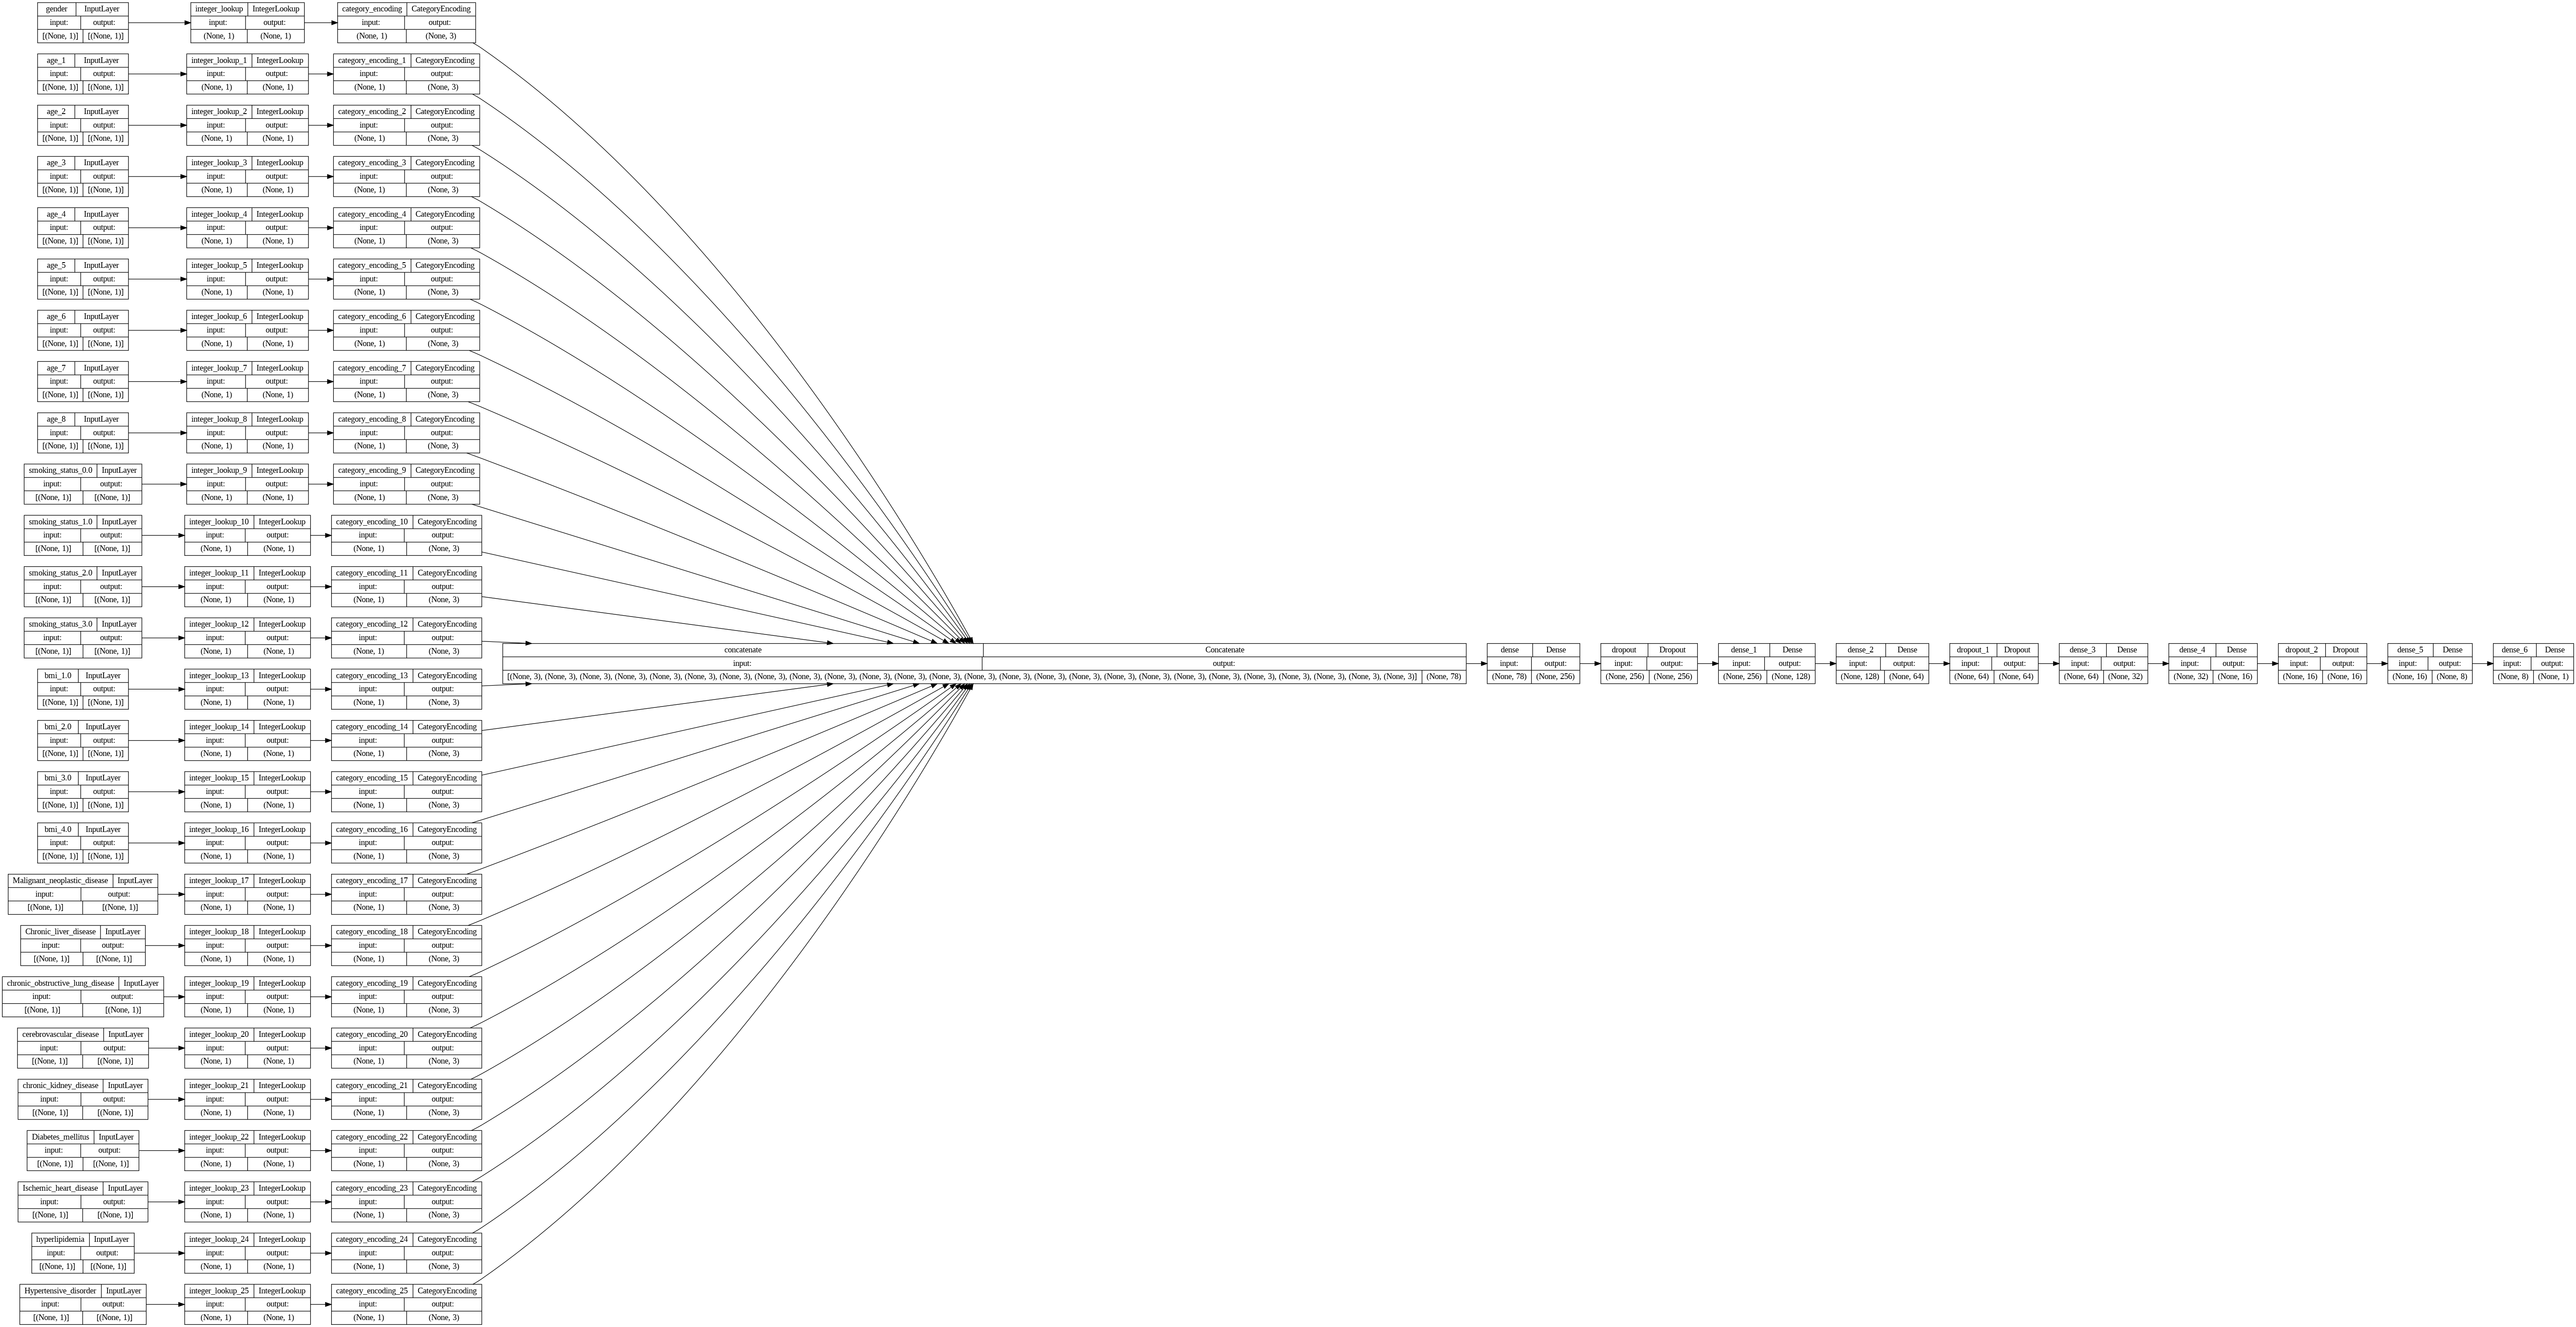

In [43]:
tf.keras.utils.plot_model(model, show_shapes=True, rankdir="LR")

In [44]:
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_auc',
    verbose=1,
    patience=20,
    mode='max',
    restore_best_weights=True)

In [45]:
history = model.fit(all_ds, epochs=100, validation_data=all_ds,callbacks=[early_stopping],class_weight = class_weights)

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/engine/functional.py:642: UserWarning: Input dict contained keys ['person_id'] which did not match any model input. They will be ignored by the model.
  inputs = self._flatten_to_reference_inputs(inputs)
/usr/local/lib/python3.10/dist-packages/keras/src/backend.py:5820: UserWarning: "`binary_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Sigmoid activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


1143/1143 [==============================] - 45s 35ms/step - loss: 0.2277 - recall: 0.9610 - precision: 0.3675 - tp: 3376.0000 - fp: 5810.0000 - tn: 27252.0000 - fn: 137.0000 - accuracy: 0.8374 - auc: 0.9600 - prc: 0.7735 - val_loss: 0.2188 - val_recall: 0.9397 - val_precision: 0.4281 - val_tp: 3301.0000 - val_fp: 4410.0000 - val_tn: 28652.0000 - val_fn: 212.0000 - val_accuracy: 0.8736 - val_auc: 0.9693 - val_prc: 0.8202
Epoch 2/100
1143/1143 [==============================] - 29s 25ms/step - loss: 0.2087 - recall: 0.9542 - precision: 0.3938 - tp: 3352.0000 - fp: 5160.0000 - tn: 27902.0000 - fn: 161.0000 - accuracy: 0.8545 - auc: 0.9657 - prc: 0.8024 - val_loss: 0.1969 - val_recall: 0.9180 - val_precision: 0.4558 - val_tp: 3225.0000 - val_fp: 3851.0000 - val_tn: 29211.0000 - val_fn: 288.0000 - val_accuracy: 0.8868 - val_auc: 0.9698 - val_prc: 0.8223
Epoch 3/100
1143/1143 [==============================] - 28s 24ms/step - loss: 0.2121 - recall: 0.9619 - precision: 0.3879 - tp: 3379.0000

In [48]:
test = kd_df.drop('person_id',axis=1)

In [49]:
testing = df_to_dataset(test,batch_size=len(test),shuffle=False)

In [54]:
pred = model.predict(testing)
pred = [ 1 if x >= 0.5 else 0 for x in pred]


[(_, label)] = testing.take(1)
print(confusion_matrix(label,pred,labels=[1,0]))
print(classification_report(label,pred))

1/1 [==============================] - 0s 43ms/step
[[ 45  44]
 [179 141]]
              precision    recall  f1-score   support

           0       0.76      0.44      0.56       320
           1       0.20      0.51      0.29        89

    accuracy                           0.45       409
   macro avg       0.48      0.47      0.42       409
weighted avg       0.64      0.45      0.50       409



In [55]:
fpr, tpr, thresholds =roc_curve(label, pred)

score = auc(fpr, tpr)
print("AUC : ", score)

AUC :  0.47312148876404503
